# Logistic Regression

In this checkpoint, we are going to work again on the Titanic data set, but this time we will use logistic regression to predict if a passenger will survive or not. 

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


[Text(0, 0, '0'), Text(0, 0, '1')]

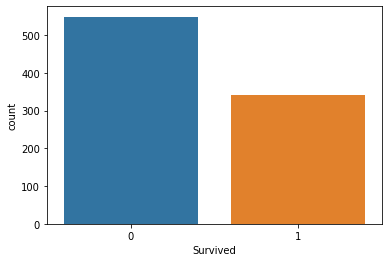

In [4]:
chart = sns.countplot(x="Survived", data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)


This barplot shows us that the overwhelming majority of the Titanic passengers died, highlighting the scale of the catastrophe. Indeed, there were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died ( after it collided with an iceberg during its maiden voyage from Southampton to New York City), making it one of the deadliest commercial peacetime maritime disasters in modern history.

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Firstly, in order to invertigate our data, we list our features with a short description :

PassengerId: Unique Id number of the passenger

Survived: Survival (0 = No, 1 = Yes)

Pclass: Ticket class (hierarchical number that refers to the economic status of the passenger)

Name: Name of the passenger

Sex: Gender of the passenger

Age: Age in years

SibSp: # of siblings / spouses aboard the Titanic

Parch: # of parents / children aboard the Titanic   

Ticket: Ticket number

Fare: Amount of money spent for ticket

Cabin: Cabin number

Embarked: Port of Embarkation (C = cherbourg, Q = Queenstown, S = Southampton)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can notice that 2 of the features are floats, 5 are integers and 5 are objects.

In [7]:
# Return the number of unique elements in our dataset
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
df.isnull().sum().sum()

866

So, in the the data-preprocession phase, we will handle null values.

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Thanks to the .isnull().sum() method, we now detected the features that contain missing values : Age, Cabin and Embarked.
The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since a lot of it's data is missing.

In [10]:
# We are trying to predict the survival of a passenger aboard the Titanic. So, logically, we will not need  need his Id number, his name and the number of his ticket.
# Indeed, it would make sense to drop " PassengerId ", " Ticket " and "Name" beause it does not contribute to an individual's survival probability. Except that we need the column " Name " because we will use the Name feature to extract the Titles from the Name, so that we can build a new relevant feature out of that.
df = df.drop(columns = ["Ticket", "PassengerId"])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### Dealing with missing data

 As a reminder, we have to deal with Cabin (687), Embarked (2) and Age (177).

In [11]:
# We calculate the percentage of missing values for the variable : 1-{non-null-values/total number of values}*100
print ("Percentage of missing values for age: ",(1-((714/891)))*100)
print ("Percentage of missing values for cabin: ",(1-((204/891)))*100)

Percentage of missing values for age:  19.865319865319865
Percentage of missing values for cabin:  77.1043771043771


The general accepted practice seems to be to fix missing values when they are below 30% missing, based on the above, this means age can be fixed, where as cabin variable really should be dropped.

In [12]:
df = df.drop(columns = ["Cabin"])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [13]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
# In the Embarked categorical feature, we will replace the missing values with the most frequent class (S).
common_value = "S"
df["Embarked"] = df["Embarked"].fillna(common_value)

In [15]:
# We use the fillna() function to replace the missing values of the column Age with the mean of it's data.
df["Age"].fillna(df["Age"].mean(), inplace = True)

In [16]:
df.isnull().sum().sum()

0

So, now that we have dealed with the missing values of our dataset, we will transform all the object type values to numerical values, as a final step in the preprocession part.

In [17]:
# We convert the categorical feature " Sex " (binary type) to a numeric one, so that the machine learning algorithms can process this information. We will do that by hand using a dictionary where we have two categories (male = 1 ; feamle = 0).
# In order to convert each value, that the nominal variable can take, to a number, we will use the label encoder function in the sklearn library.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Sex"] = encoder.fit_transform(df["Sex"])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S


In [18]:
ports = {"S": 0, "C": 1, "Q": 2}
df['Embarked'] = df['Embarked'].map(ports)

In [19]:
# Converting “ Fare ” from float to int64, using the “astype()” function
df["Fare"] = df["Fare"].astype(int)
# Converting “ Age ” from float to int64, using the “astype()” function
df["Age"] = df["Age"].astype(int)

In [20]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71,1
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53,0
4,0,3,"Allen, Mr. William Henry",1,35,0,0,8,0


In [21]:
# Let's create the new AgeGroup variable, by categorizing every age into a group.
# For that, we will use the pd.cut() function that has 3 essential parts (PD.CUT(column, bins=[], labels=[])).
# The bins represent cut off points of bins for the data contained in our initial column. The second necessary components are the labels.
# Therefore, there are two lists that you will need to populate with your cut off points for your bins. The key here is that your labels will always be one less than to the number of bins.
# The first number in the list represents the start point of the bin and the next number represents the cutoff point of the bin.
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 2, 16, 26, 40, 65, 99], labels=['Toddler/Baby','Child','Young','Adult', 'Mid-Age', 'Senior'])

In [22]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7,0,Young
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71,1,Adult
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7,0,Young
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53,0,Adult
4,0,3,"Allen, Mr. William Henry",1,35,0,0,8,0,Adult


In [23]:
# Let's see how it's distributed:
df["AgeGroup"].value_counts()

Adult           424
Young           219
Mid-Age         140
Child            76
Toddler/Baby     17
Senior            8
Name: AgeGroup, dtype: int64

In [24]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7,0,Young
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71,1,Adult
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7,0,Young
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53,0,Adult
4,0,3,"Allen, Mr. William Henry",1,35,0,0,8,0,Adult


In [25]:
# Converting AgeGroup feature into a numeric one
AgeGroup_categories = {"Toddler/Baby": 0, "Child": 1, "Young": 2, "Adult": 3, "Mid-Age": 4, "Senior": 5}
df['AgeGroup'] = df['AgeGroup'].map(AgeGroup_categories)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7,0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71,1,3
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53,0,3
4,0,3,"Allen, Mr. William Henry",1,35,0,0,8,0,3


In [26]:
# For the Fare feature, we need to do the same as with the Age feature: we need to modify the Fare variable, by categorizing it's values. We are going to create 3 categories for the "Fare" column: Under the median value, between the median value and the 0.75 quantile, over the 0.75 quantile.

intervals = (df['Fare'].min(), df['Fare'].quantile(q=0.5), df['Fare'].quantile(q=0.75), df['Fare'].max())
cats = ["cheap", "expensive", "millionaire"]

df["Fare_cat"] = pd.cut(df.Fare, intervals, labels=cats)
# Note here that we isolated the Fare column using df.Fare notation.


In [27]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Fare_cat
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7,0,2,cheap
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71,1,3,millionaire
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7,0,2,cheap
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53,0,3,millionaire
4,0,3,"Allen, Mr. William Henry",1,35,0,0,8,0,3,cheap


In [28]:
# Let's see how it's distributed
df["Fare_cat"].value_counts()

cheap          442
expensive      223
millionaire    211
Name: Fare_cat, dtype: int64

In [29]:
# Converting Fare_cat feature into a numeric one
Fare_categories = {"cheap": 0, "expensive": 1, "millionaire": 2}
df['Fare_cat'] = df['Fare_cat'].map(Fare_categories)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Fare_cat
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7,0,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71,1,3,2
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7,0,2,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53,0,3,2
4,0,3,"Allen, Mr. William Henry",1,35,0,0,8,0,3,0


In [30]:
# Now the can drop the less useful initial colum
df = df.drop(columns = "Fare")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Fare_cat
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,0,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,1,3,2
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,0,2,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,0,3,2
4,0,3,"Allen, Mr. William Henry",1,35,0,0,0,3,0


In [31]:
# SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic.
# We create a new unattached column. It's data consist on the addition of the value corresponding to the Parch feature and the value corresponding to the SibSp feature on each row, thanks to the lambda function below. 
df.apply(lambda row: row.Parch + row.SibSp, axis = 1)
# We attach this new column to our dataframe.
df["FamilySize"] = df.apply(lambda row: row.Parch + row.SibSp, axis = 1)
# Once we have created the FamilySize column, we drop the two initial less useful columns : Parch and SibSp.
df = df.drop(columns = ["Parch", "SibSp"])
df.head()

,Survived,Pclass,Name,Sex,Age,Embarked,AgeGroup,Fare_cat,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,22,0,2,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,3,2,1
2,1,3,"Heikkinen, Miss. Laina",0,26,0,2,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,0,3,2,1
4,0,3,"Allen, Mr. William Henry",1,35,0,3,0,0


In [32]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master",

                    }

In [33]:
title=[]
df1=' '
for data in df['Name']:
    
    df1=data.split(',') 
    
    df1=df1[1].split('.')
    df2=df1[0].strip()
    print(df2)
    title.append(str(df2))
df['title']=title 


Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Master
Mrs
Mrs
Miss
Miss
Mr
Mr
Miss
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Don
Mrs
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Miss
Mrs
Mrs
Mr
Miss
Miss
Mr
Mr
Miss
Mr
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Master
Mr
Miss
Mr
Master
Mr
Master
Mrs
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mrs
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Mr
Master
Mr
Mr
Miss
Mr
Mr
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Mr
Miss
Mr
Rev
Rev
Mrs
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Master
Mr
Mrs
Mr
Mr
Master
Master
Mrs
Mrs
Mr
Mr
Mr
Master
Miss
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Master
Master
Miss
Mr
Mrs
Mr
Mr
Mr
Mrs
Mr
Miss
Master
Mrs
Miss
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Miss
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Dr
Miss
Mrs
Mr
Rev
Mr
Mrs
Mr
Mr
Mrs
Mrs
Mrs
Miss
Miss
Mrs
M

In [34]:
df['title']=df['title'].map(Title_Dictionary)

In [35]:
# now that we have created the " title " feature, we can drop the useless column " Name "
df = df.drop(columns = ["Name"])
df.head()

,Survived,Pclass,Sex,Age,Embarked,AgeGroup,Fare_cat,FamilySize,title
0,0,3,1,22,0,2,0,1,Mrs
1,1,1,0,38,1,3,2,1,Mrs
2,1,3,0,26,0,2,0,0,Miss
3,1,1,0,35,0,3,2,1,Mrs
4,0,3,1,35,0,3,0,0,Mrs


In [36]:
# Let's see how it's distributed
df["title"].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: title, dtype: int64

In [37]:
# Converting the title feature which is categorical into a numeric one
title_categories = {"Mrs": 1, "Miss": 2, "Master": 3, "Officer": 4,"Royalty": 3}
df['title'] = df['title'].map(title_categories)
df.head()

,Survived,Pclass,Sex,Age,Embarked,AgeGroup,Fare_cat,FamilySize,title
0,0,3,1,22,0,2,0,1,1
1,1,1,0,38,1,3,2,1,1
2,1,3,0,26,0,2,0,0,2
3,1,1,0,35,0,3,2,1,1
4,0,3,1,35,0,3,0,0,1


Now that we finished the feature-engineering part, the next step is to visualize our data...

Text(0, 0.5, 'Survival Probability')

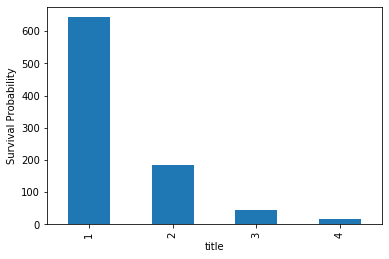

In [38]:
plt = df.title.value_counts().sort_index().plot(kind='bar', title='')
plt.set_xlabel('title')
plt.set_ylabel('Survival Probability')

We can conclude based on the barplot above that Mrs are more likely to die while Ms and Masters that are younger passengers have much more chances to survive. So, the " tilte " feature is significantly correlated with the survival rate.

In [39]:
df.groupby(["Sex"]).mean()

,Survived,Pclass,Age,Embarked,FamilySize,title
Sex,,,,,,
0,0.742038,2.159236,28.089172,0.461783,1.343949,1.611465
1,0.188908,2.389948,30.336222,0.306759,0.665511,1.237435


Text(0, 0.5, 'Survival Probability')

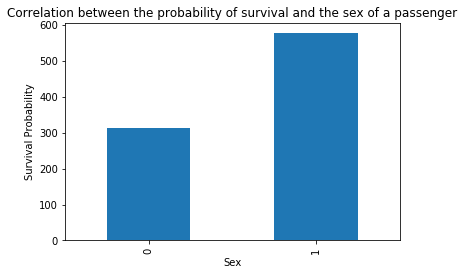

In [40]:
plt = df.Sex.value_counts().sort_index().plot(kind='bar', title='Correlation between the probability of survival and the sex of a passenger')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

The rate of survival is much more important for female passengers than for male passengers. So we can say that women had a better chance of surviving the terrible sinking. Thus, we can conclude based on the barplot above that Sex contribed to high survival rate : the feature is very helpful for our predictions.

In [41]:
df.groupby(["Survived"]).mean()

,Pclass,Sex,Age,Embarked,FamilySize,title
Survived,,,,,,
0,2.531876,0.852459,30.240437,0.307832,0.883424,1.240437
1,1.950292,0.318713,28.426901,0.447368,0.938596,1.576023


In [42]:
df.groupby(["Pclass","Sex"]).mean()

Survived        Age  Embarked  FamilySize     title
Pclass Sex                                                     
1      0    0.968085  34.074468  0.478723    1.010638  1.595745
       1    0.368852  39.155738  0.360656    0.590164  1.319672
2      0    0.921053  28.723684  0.144737    1.092105  1.447368
       1    0.157407  30.564815  0.111111    0.564815  1.388889
3      0    0.500000  23.847222  0.618056    1.694444  1.708333
       1    0.135447  27.164265  0.348703    0.723343  1.161383

In [43]:
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [46]:
# Let's visualize the correlation between title and other features.
df.groupby(["title"]).mean()

,Survived,Pclass,Sex,Age,Embarked,FamilySize
title,,,,,,
1,0.281493,2.329705,0.804044,32.230171,0.298600,0.651633
2,0.702703,2.286486,0.000000,23.200000,0.578378,1.243243
3,0.577778,2.444444,0.955556,10.777778,0.355556,3.311111
4,0.277778,1.444444,0.944444,45.722222,0.388889,0.444444


In [47]:
df[["title", "Survived"]].groupby(["title"], as_index = True).mean()

,Survived
title,
1,0.281493
2,0.702703
3,0.577778
4,0.277778


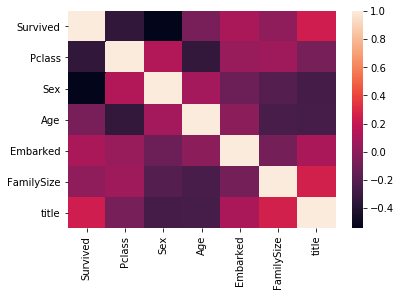

In [48]:
corr = df.corr()
sns.heatmap(corr)

In [53]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x=data[["Age", "Sex", "Fare_cat", "FamilySize, "Embarked", "title"]]
y=data["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

SyntaxError: invalid syntax (<ipython-input-53-ee3f7fa68445>, line 7)

In [ ]:
logreg.score(x_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(logit1.predict(x),y)

In [ ]:
fpr, tpr,_=roc_curve(logreg.predict(x),y,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

#  Decision Trees


In [ ]:
from sklearn import tree
features=['sex','age','Family','sibsp','parch','title']
x=df[features]
y=df['survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

In [ ]:
dt_clf = tree.DecisionTreeClassifier(max_depth=10,random_state = 10)
dt_clf.fit(x_train, y_train)
results = dt_clf.predict(x_test)
print(metrics.accuracy_score(y_test, results))

In [ ]:
dt_clf =tree.DecisionTreeClassifier(criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=2,)
dt_clf.fit(x_train, y_train)
results = dt_clf.predict(x_test)
print(metrics.accuracy_score(y_test, results))

In [ ]:
dot_data=tree.export_graphviz(dt_clf,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("data")
graph

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
random_grid = {'n_estimators': n_estimators,}

In [ ]:
param_grid = {
    
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(x_train, y_train)
grid_search.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rf_clf = RandomForestClassifier(n_estimators=300)
rf_clf.fit(x_train,y_train)
y_predict=rf_clf.predict(x_test)
metrics.accuracy_score(y_test,y_predict)